In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [6]:
df[(df['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

Note: We can infer from above that Drop timestamp are empty when the Status is No Cars Available or Cancelled. Since the trips did not happen in those cases, the Drop timestamp can not be available, hence the null values here are valid.

#### Converting "Request timestamp" and "Drop timestamp" objects to date time to derive time slots.

In [7]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"])
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"])

In [8]:
df['Req hour']=df["Request timestamp"].dt.hour
# Extracting hours from Request TImestamp

In [9]:
statuscount=df[["Request id","Status"]].groupby("Status").count()
statuscount

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


## Binning Into Time Periods

In [10]:
def time_period(x):
    "We will be diving the time into 5 slots"
    if x < 5:
        return "Early Morning" # creating slot of early morning for rides before 5AM
    elif 5 <= x < 12:
        return "Morning" # creating time slot of morning for rides after 5AM and before noon.
    elif 12 <= x < 17:
        return "Afternoon" # creating time slot of afternoon for rides after noon till 5pm.
    elif 17 <= x < 22:
        return "Evening" # creating time slot of morning for rides after 5pm till 10pm.
    else:
        return "Late Night" # anytime after 10pm will be considered late night.

In [11]:
df['Time slot'] = df['Req hour'].apply(lambda x: time_period(x))
# Creating New Column 'Time Slot'
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


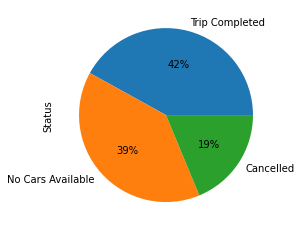

In [12]:
df["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

Since "Trip completed" is the supply fulfilled from Uber we can see that Uber is only able to meet 42% of its total demand whereas a big chunk of 39% is lost to No cars available and 19% to ride cancellations totalling 58% in lost revenues

In [13]:
df_city = df[df['Pickup point']=="City"]
df_airport = df[df['Pickup point']=="Airport"]

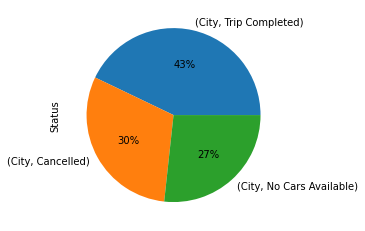

In [14]:
df_city.groupby(["Pickup point"]).Status.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

57% of demand is not being met. A good 30% of trips are cancelled by the drivers.

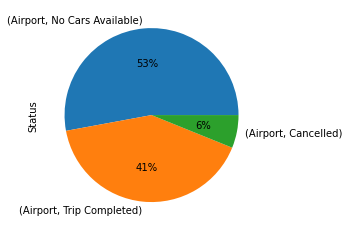

In [15]:
df_airport.groupby(["Pickup point"]).Status.value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

More than half of the time there is no cars available from Airport to City.

#### Plot data to show hourly distribution of request/demand

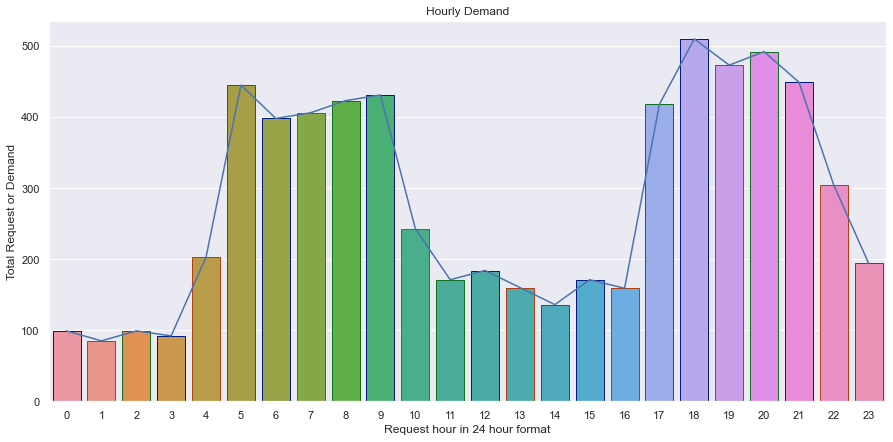

In [16]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
df.groupby(df['Req hour']).count()['Request id'].plot(ax=ax)
sns.countplot(df['Req hour'], edgecolor=sns.color_palette("dark", 3))
plt.xlabel('Request hour in 24 hour format')
plt.ylabel('Total Request or Demand')
plt.show()

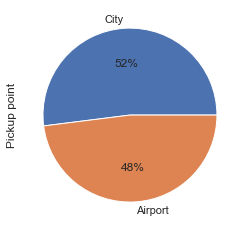

In [17]:
df["Pickup point"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

There is slightly higher demand in City than Airport.

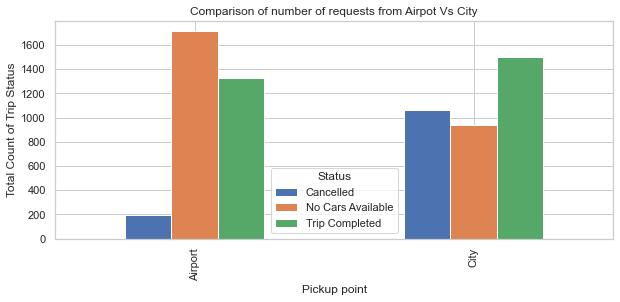

In [18]:
sns.set_style("whitegrid")
df.groupby(['Pickup point','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,4))
plt.title('Comparison of number of requests from Airpot Vs City')
plt.xlabel('Pickup point')
plt.ylabel('Total Count of Trip Status')

plt.show()

In [19]:
df.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


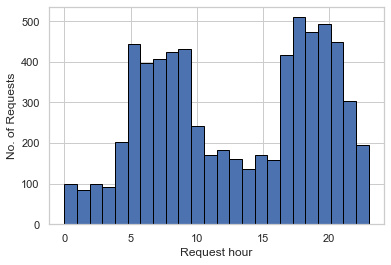

In [20]:
plt.hist(df["Req hour"],edgecolor='black',bins=24)
plt.xlabel("Request hour")
plt.ylabel("No. of Requests")
plt.show()

We can infer from this above graph that at the 18 hour which is 6pm is the highest demand for a uber ride. While at 1am is the lowest demand for an uber.


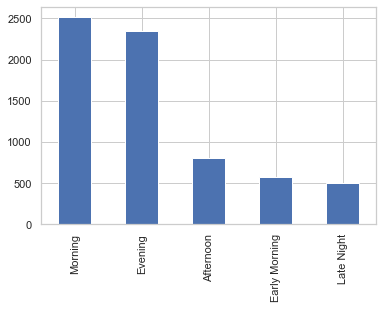

In [21]:
df['Time slot'].value_counts().plot.bar()
plt.show()

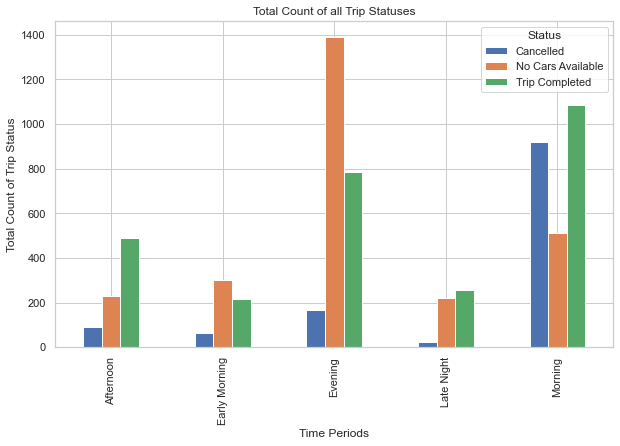

In [22]:
df.groupby(['Time slot','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(10,6))
plt.title('Total Count of all Trip Statuses')
plt.xlabel('Time Periods')
plt.ylabel('Total Count of Trip Status')
plt.show()

There are No Cars Available during Evenings. Most trips are cancelled in the Morning 


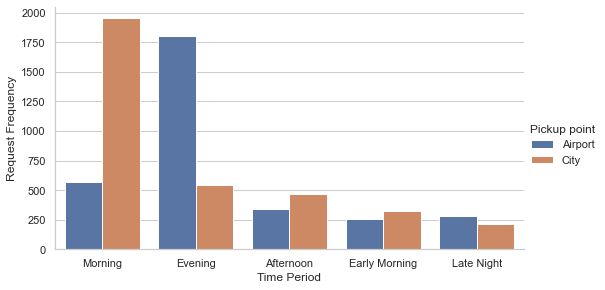

In [23]:
sns.factorplot(x='Time slot', hue='Pickup point' , data=df , kind='count', height=4, aspect=11/6)
plt.xlabel('Time Period')
plt.ylabel('Request Frequency')
plt.show()
plt.close()

We can clearly see there is a rush hour during mornings at City and rush hour during evenings at Airport. 
We will analyze it further below

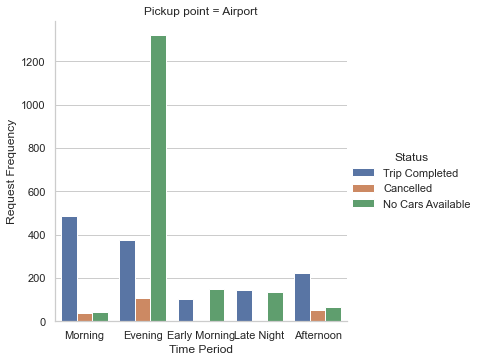

In [24]:
# let's look at the supply and demand in evening rush hour at Airport
sns.catplot(x= 'Time slot', hue='Status',row ='Pickup point', data= df_airport , kind='count')
plt.ylabel('Request Frequency')
plt.xlabel('Time Period')
plt.show()

There is a huge supply gap during Evenings at Airport mainly due to No Cars Available.

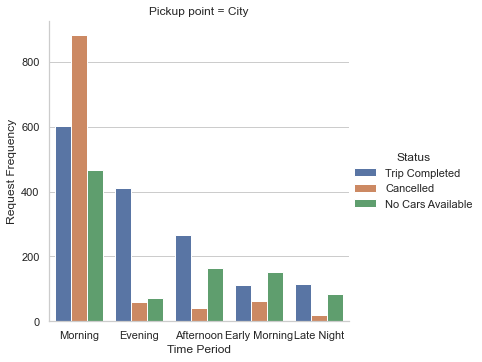

In [25]:
# let's look at the supply and demand in morning rush hour in City
sns.catplot(x='Time slot', hue='Status',row ='Pickup point', data=df_city , kind='count')
plt.ylabel('Request Frequency')
plt.xlabel('Time Period')
plt.show()

There is a huge supply gap during Mornings in City mainly due to trip cancellations.

In [26]:
df['Drop hour'] = df["Drop timestamp"].dt.hour

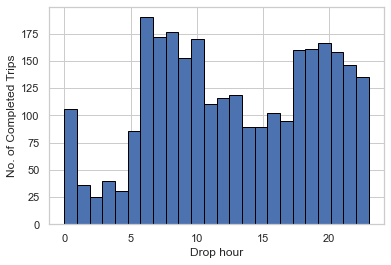

In [27]:
plt.hist(df['Drop hour'],edgecolor='black',bins=24)
plt.xlabel("Drop hour")
plt.ylabel("No. of Completed Trips")
plt.show()

We can see that 6am has the highest drop time 

In [28]:
df['Ride Duration']=df['Drop timestamp']-df["Request timestamp"]

In [29]:
 df['Ride Duration']=round(df['Ride Duration'].dt.total_seconds()/60)

In [30]:
#df['Ride Duration']=df['Ride Duration']/ np.timedelta64(1, 'h')

In [31]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Req hour,Time slot,Drop hour,Ride Duration
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,13.0,69.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,18.0,50.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,9.0,41.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Evening,22.0,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,9.0,53.0


In [32]:
def pie_chart(dataframe):
    
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            labels=labels,
            autopct='%1.1f%%',
            shadow=False,
            startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

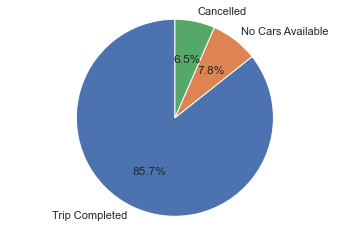

In [33]:
# Status of trips during morning rush hour where pickup point is Airport
city = df.loc[(df["Pickup point"] == "Airport") & (df["Time slot"] == "Morning")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

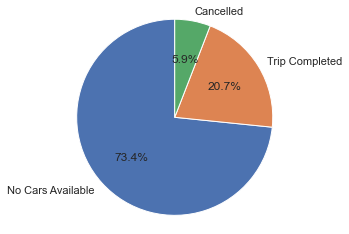

In [34]:
# Status of trips during Evenings rush hour where pickup point is Airport
city = df.loc[(df["Pickup point"] == "Airport") & (df["Time slot"] == "Evening")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

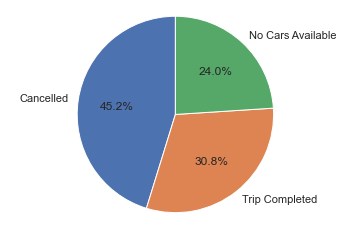

In [35]:
# Status of trips during morning rush hour where pickup point is City
city = df.loc[(df["Pickup point"] == "City") & (df["Time slot"] == "Morning")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)

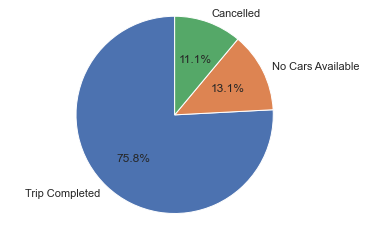

In [36]:
# Status of trips during evening rush hour where pickup point is City
city = df.loc[(df["Pickup point"] == "City") & (df["Time slot"] == "Evening")]
city_count = pd.DataFrame(city.Status.value_counts())
pie_chart(city_count)